## Fundamentos de robótica móvil
# TP2: Mediciones de sensor de barrido láser

---
**Grupo N°5:**
* **86242** - Carrizo Fabrizio
* **86940** - Valdez Axel
* **72653** - Villagra Marcos
---

#### **Objetivos**
Analizar las mediciones de un sensor de barrido láser y la relación entre los sistemas de coordenadas del sensor, robot y del entorno.

### **Actividades**

#### **Parte 1: Registro de datos de simulación**

1. Ejecutar la simulación del robot bcr_bot en Gazebo y la aplicación de registro de datos:

    * Ejecutar el simulador del robot TurtleBot3, la teleoperación y el registro de datos (en 3 terminales diferentes):

        ```bash
        > ros2 launch bcr_bot gz.launch.py
        > ros2 run teleop_twist_keyboard teleop_twist_keyboard --ros-args -r cmd_vel:=bcr_bot/cmd_vel
        > ros2 bag record /bcr_bot/cmd_vel /bcr_bot/odom /bcr_bot/scan
        ```

    * Mover el robot utilizando el teclado intentando abarcar la mayor parte del escenario de trabajo del robot. Luego detener el registro de datos y los demás programas ejecutados (utilizar Ctrl + C).

2. Convertir los datos almacenados en el archivo de registro (.bag) a formato de texto plano (.txt), como se indicó anteriormente.

3. Codificar un script en Python que cargue los datos del archivo scan.txt y genere gráficos en coordenadas polares de 3 barridos del sensor láser distribuidos de forma uniforme en el tiempo de simulación.

##### **Formato de los archivos de datos**

Los datos de odometría y sensor de barrido láser se almacenan en archivos de texto separados, odom.txt y scan.txt respectivamente. Estos archivos guardan los datos como se describe a continuación.

Por un lado, el archivo de datos de odometrı́a (odom.txt) contiene la siguiente información:

```bash
    Timestamp       Pos_X          Pos_Y             Theta          Vel_Lineal     Vel_Angular
0     4.60000	 -3.74990	 6.75000           0.00000             0.00000	       0.00000
1     4.70000	 -3.74990	 6.75000	   0.00000	       0.00000	       0.00000
2     4.80000	 -3.74990	 6.75000	   0.00000	       0.00000	       0.00000
3     4.90000	 -3.74824	 6.75000	   0.00000	       0.14963	      -0.00000
4     5.00000	 -3.71251	 6.75000	  -0.00000	       0.45456	      -0.00000
...                                                                                        ...

```

Por otra parte, el archivo de datos del sensor de barrido láser (scan.txt) contiene:

```bash
    Timestamp       i_1         i_2         i_3         i_4          i_5         i_6    ...
0     4.52200	6.09644     6.09609 	6.09887     6.10252     10.62796    10.63891    ...
1     4.55500 	6.09560	    6.09748     6.09894     6.10159     10.62555    10.64089    ...
2     4.58800 	6.09529	    6.09586     6.09786     6.10184     10.62631    10.64007    ...
3     4.62100 	6.09569	    6.09364     6.09791     6.10076     10.62752    10.64098    ...
4     4.65400	6.09662	    6.09519     6.09715     6.10141     10.62600    10.63916    ...
...                                                                                     ...

```

##### **Parámetros del barrido láser**

Los parámetros del sensor de barrido láser se pueden obtener desde el mensaje del tópico scan:

```bash
> ros2 topic echo /bcr_bot/scan --once
header:
  stamp:
    sec: 23
    nanosec: 464000000
  frame_id: two_d_lidar
angle_min: 0.0
angle_max: 6.2831854820251465
angle_increment: 0.01745329238474369
time_increment: 0.0
scan_time: 0.0
range_min: 0.550000011920929
range_max: 16.0
ranges:
- 6.853433132171631
- 6.6430768966674805
- 6.855534553527832
- 2.780411958694458
- '...'
intensities:
- 0.0
- 0.0
- 0.0
- '...'
---
```
De aquí podemos extraer el alcance del sensor (range_min = 0.55 y range_max = 16.0).

También vemos que el barrido es de 360° (angle_min = 0.0 y angle_max = 6.2831... en radianes) y según el angle_increment = 0.01745... podemos determinar que toma 360 muestras.

Estos datos serán importantes para la obtención de los gráficos.

##### **Verificación de datos**

Es conveniente verificar que los datos guardados en el registro de ROS se correspondan en cantidad con los datos de los archivos .txt para ello se utilizan los comandos wc -l y ros2 bag info.

```bash
> ros2 bag info ~/ros2_ws/bag/rosbag2_2025_08_06-04_47_02/
Files:             rosbag2_2025_08_06-04_47_02_0.db3
Bag size:          5.1 MiB
Storage id:        sqlite3
Duration:          1119.807697421s
Start:             Aug  6 2025 04:47:03.291143184 (1754455623.291143184)
End:               Aug  6 2025 05:05:43.098840605 (1754456743.098840605)
Messages:          1741
Topic information: Topic: /bcr_bot/scan | Type: sensor_msgs/msg/LaserScan | Count: 1280 | Serialization Format: cdr
                   Topic: /bcr_bot/odom | Type: nav_msgs/msg/Odometry | Count: 422 | Serialization Format: cdr
                   Topic: /bcr_bot/cmd_vel | Type: geometry_msgs/msg/Twist | Count: 39 | Serialization Format: cdr
```

```bash
> wc -l odom.txt
422 odom.txt
> wc -l scan.txt
1280 scan.txt
```

Como se puede observar, coinciden la cantidad de datos obtenidos. Los .txt se pueden ver en los siguientes links:
* [odom.txt](https://drive.google.com/file/d/1WE9RM3B0ViGZSib1N_0WhEuDsDIjIlHz/view?usp=sharing)
* [scan.txt](https://drive.google.com/file/d/1-IRlb9MvBWSbw_umP2pe03_Wkm98Op0C/view?usp=sharing)

### **Gráfico del barrido láser**

El siguiente script va lee los datos de scan.txt y realiza 3 gráficos en coordenadas polares de 3 momentos distintos del recorrido realizado por el robot. Además se adjuntaron imagenes de la ubicación del robot en dichos momentos para contrastar los gráficos.

<img src="Imágenes/Barrido_1.png" alt="Gráfico 1" width="450">
<img src="Imágenes/Barrido_2.png" alt="Gráfico 2" width="450">
<img src="Imágenes/Barrido_3.png" alt="Gráfico 3" width="450">

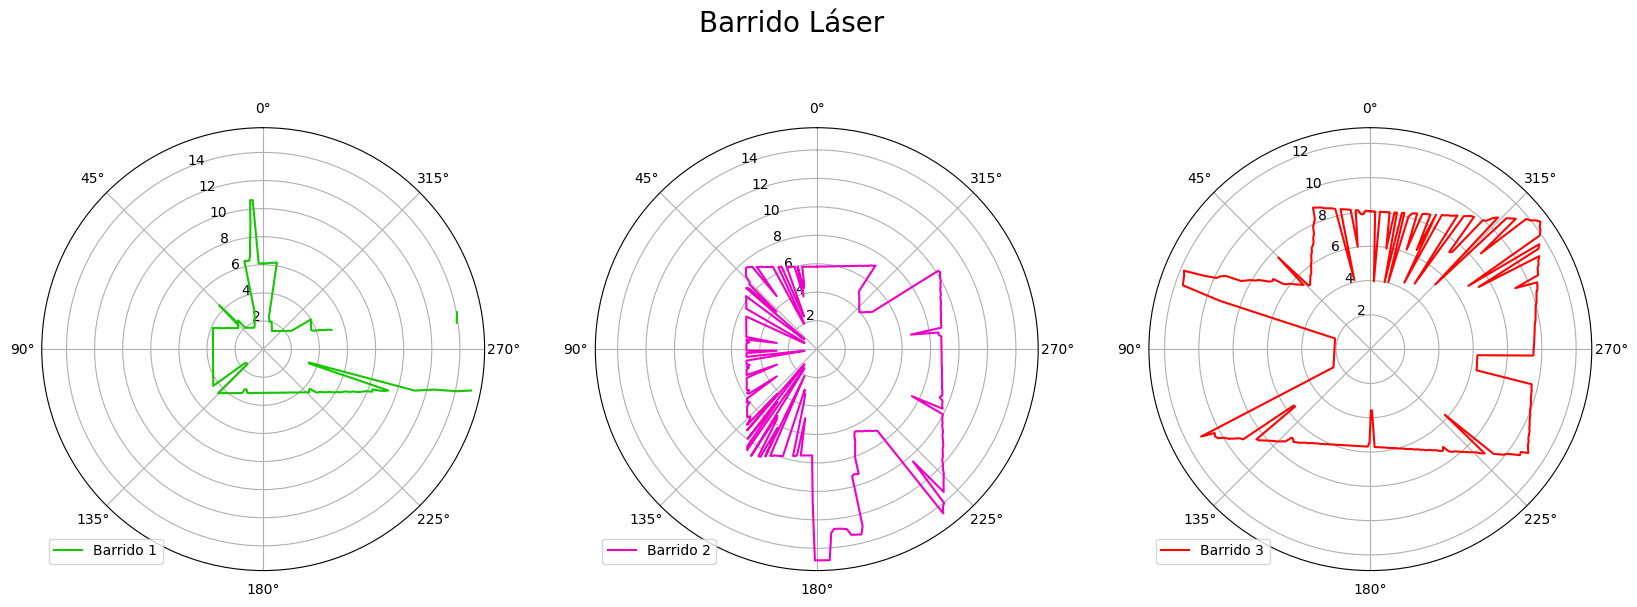

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Archivo de datos del sensor de barrido láser
archivo_laser = 'scan.txt'

# Cargar los datos del sensor de barrido láser en un DataFrame
datos_scan = pd.read_csv(archivo_laser, header=None, sep=r'\s+')

# Seleccionar tres filas distribuidas uniformemente en el tiempo
barrido1 = datos_scan.iloc[10, 1:361]         # Inicio
barrido2 = datos_scan.iloc[600, 1:361]        # Medio
barrido3 = datos_scan.iloc[1279, 1:361]       # Final

# Obtener los valores de rango para cada fila
barrido1 = barrido1.values
barrido2 = barrido2.values
barrido3 = barrido3.values

# Gráfico polar con 3 subgráficos
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(20, 7))

theta = np.linspace(0, 360, num=360)

# Rotar 90° para coincidir el frente del robot con la parte superior del gráfico
for ax in axs:
    ax.set_theta_zero_location('N')

# Título y etiquetas
fig.suptitle('Barrido Láser', fontsize=20)

# Ajusta el espacio horizontal entre los subgráficos
fig.subplots_adjust(wspace=0.25)

# Graficar cada barrido
axs[0].plot(np.deg2rad(theta), barrido1, label='Barrido 1', color="#14C700")
axs[0].legend(loc='lower left')

axs[1].plot(np.deg2rad(theta), barrido2, label='Barrido 2', color="#EF00C7")
axs[1].legend(loc='lower left')

axs[2].plot(np.deg2rad(theta), barrido3, label='Barrido 3', color="#FF0303")
axs[2].legend(loc='lower left')

plt.savefig("Imágenes/Barrido_Laser.png")
plt.show()

#### **Parte 2: Sincronización de datos**

Como es usual, la tasa de muestreo de las mediciones de odometría (pose del robot) y del sensor de barrido láser son diferentes y por lo tanto los timestamps no coinciden. Esto sucede en los datos adquiridos en las simulaciones anteriores, donde la tasa de medición de odometría es mayor que del sensor de barrido láser. Ante esta situación, se pide:

1. Determinar la frecuencia de mediciones de odometría y del sensor de barrido láser utilizando los comandos de ROS.

2. Suponiendo que los valores de timestamp de las mediciones de odometría y del sensor de barrido láser se encuentran almacenados en sendos arreglos unidimensionales. Diseñar un algoritmo que determine los índices del vector de timestamp de odometría que se encuentren más próximos a los valores del vector de timestamp de las mediciones del láser.

3. Mostrar en una gráfica los instantes de tiempo (timestamp) de las mediciones del sensor de barrido láser y de odometría. Resaltar aquellos instantes de tiempo de mediciones de odometría más próximas a las del sensor de barrido láser. Mostrar solo una fracción del tiempo total de simulación.

#### **Frecuencia de muestreo de odometría y barrido láser**

Para obtener la frecuencia media se utilizan los siguientes comandos:

```bash
> ros2 topic hz /bcr_bot/odom
average rate: 0.455
        min: 2.187s max: 2.204s std dev: 0.00846s window: 2
...
...
...
average rate: 0.453
        min: 1.899s max: 2.802s std dev: 0.16363s window: 30
```
```bash
> ros2 topic hz /bcr_bot/scan
average rate: 1.499
        min: 0.595s max: 0.708s std dev: 0.05090s window: 3
...
...
...
average rate: 1.419
        min: 0.513s max: 0.982s std dev: 0.07740s window: 105
```

La frecuencia media de mensajes /odom es de 0.453 Hz $\rightarrow$ una medición cada ~2.2s\
La frecuencia media de mensajes /scan es de 1.419 Hz $\rightarrow$ una medición cada ~0.7s

In [44]:
import numpy as np

# Archivo de los datos de odometría y barrido láser
archivo_odom = 'odom.txt'
archivo_laser = 'scan.txt'

# Cargar los datos obtenidos en un DataFrame
datos_odom = pd.read_csv(archivo_odom, header=None, sep=r'\s+')
datos_scan = pd.read_csv(archivo_laser, header=None, sep=r'\s+')

# Extraer las columnas de tiempo
t_odom = datos_odom.iloc[:, 0].values
t_scan = datos_scan.iloc[:, 0].values

v_cercanos = []
i_cercanos = []

for valor_odom in t_odom:
    # Calcular diferencias absolutas con todos los valores de t_scan
    diferencias = np.abs(t_scan - valor_odom)

    # Encontrar el índice del valor más cercano
    indice_cercano = np.argmin(diferencias)
        
    # Guardar el valor y el índice
    v_cercanos.append(t_scan[indice_cercano])
    i_cercanos.append(indice_cercano)
    
for i in range(15):
    print(f"t_odom[{i}] = {t_odom[i]} -> t_scan más cercano: {v_cercanos[i]} (índice {i_cercanos[i]})")

t_odom[0] = 4.6 -> t_scan más cercano: 4.588 (índice 2)
t_odom[1] = 4.7 -> t_scan más cercano: 4.687 (índice 5)
t_odom[2] = 4.8 -> t_scan más cercano: 4.786 (índice 8)
t_odom[3] = 4.9 -> t_scan más cercano: 4.885 (índice 11)
t_odom[4] = 5.0 -> t_scan más cercano: 4.984 (índice 14)
t_odom[5] = 5.1 -> t_scan más cercano: 5.116 (índice 18)
t_odom[6] = 5.2 -> t_scan más cercano: 5.215 (índice 21)
t_odom[7] = 5.3 -> t_scan más cercano: 5.314 (índice 24)
t_odom[8] = 5.4 -> t_scan más cercano: 5.413 (índice 27)
t_odom[9] = 5.5 -> t_scan más cercano: 5.512 (índice 30)
t_odom[10] = 5.6 -> t_scan más cercano: 5.611 (índice 33)
t_odom[11] = 5.7 -> t_scan más cercano: 5.71 (índice 36)
t_odom[12] = 5.8 -> t_scan más cercano: 5.809 (índice 39)
t_odom[13] = 5.9 -> t_scan más cercano: 5.908 (índice 42)
t_odom[14] = 6.0 -> t_scan más cercano: 6.007 (índice 45)


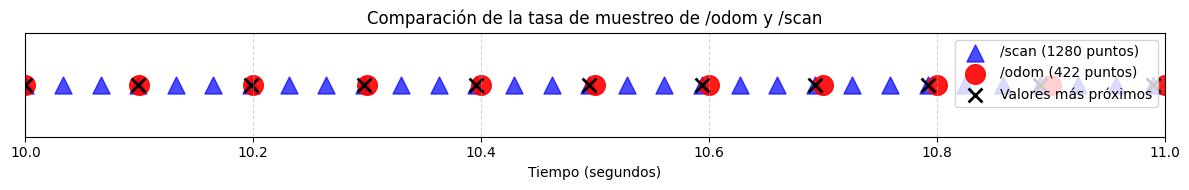

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 2))
plt.title('Comparación de la tasa de muestreo de /odom y /scan')
plt.xlabel('Tiempo (segundos)')
plt.yticks([])  # Ocultar eje Y

# Ajustar el tamaño de todos los puntos
SCAN_SIZE = 150      # t_scan tamaño
ODOM_SIZE = 200      # t_odom tamaño
CERCANOS_SIZE = 100  # v_cercanos tamaño

# Graficar t_scan
plt.scatter(t_scan, np.zeros_like(t_scan), 
           marker='^', color='blue', s=SCAN_SIZE, label='/scan (1280 puntos)', alpha=0.7)

# Graficar t_odom
plt.scatter(t_odom, np.zeros_like(t_odom), 
           color='red', s=ODOM_SIZE, label='/odom (422 puntos)', alpha=0.9)

# Graficar v_cercanos
plt.scatter(v_cercanos, np.zeros_like(v_cercanos), 
           marker='x', color='black', s=CERCANOS_SIZE, 
           linewidths=2, label='Valores más próximos')

# Configurar límites del eje X (entre 10 y 11 segundos)
plt.xlim(10, 11)

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar grid horizontal
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.savefig("Imágenes/Muestreo")
plt.show()

#### **Parte 3: Generación de mapa**

Generar un mapa a partir de las mediciones del sensor de barrido láser. Este mapa consiste en graficar las mediciones del sensor de barrido láser (puntos $(x,y)$) obtenidas durante toda la simulación en un sistema de coordenadas común, que en este caso será el de odometría.

Para esto, escribir un script que genere una gráfica del mapa, el cual tiene que:

1. Convertir las mediciones del barrido láser de coordenadas polares a rectangulares.

2. Transformar los puntos de medición del sensor láser al sistema de coordenadas de odometría y graficar.

3. Graficar junto al mapa el camino seguido por el robot.

Asumiendo que la cantidad de mediciones del sensor láser son menores que las de odometría, la conversión de sistema de coordenadas (láser $\longrightarrow$ odometría) se debe realizar con el valor de odometría más cercano en el tiempo a medición la del láser.

#### **Generación del mapa y trayectoria**

Los siguientes códigos se encargan de tomar los datos de odometría y barrido láser para poder generar un gráfico aproximado del entorno por el cual el robot se desplazó.

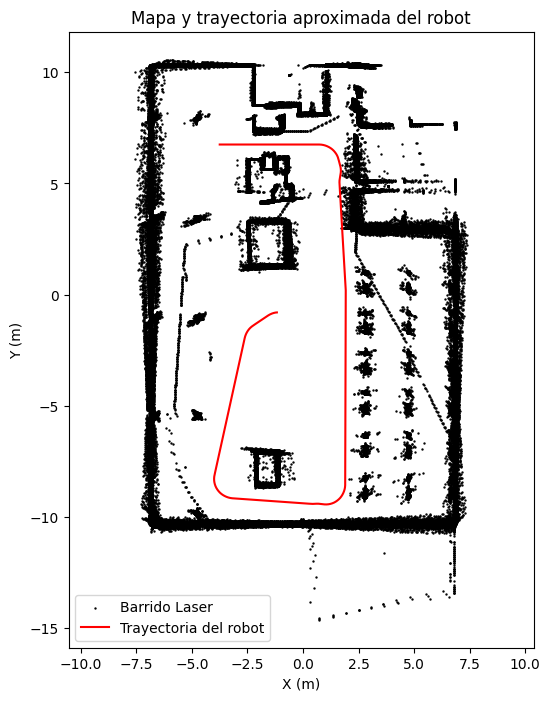

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def cambioCoordenada(r, theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]]).dot(np.array([r, 0]))

def transformarDatos(datos_scan, datos_odom, indices_pareja):
    puntos_transformados = []
    trayectoria_odom_x = []
    trayectoria_odom_y = []

    for i, indice_odom in enumerate(indices_pareja):
        scan = datos_scan[i]
        odom = datos_odom.iloc[indice_odom]

        x_odom, y_odom, angulo_odom = odom['x'], odom['y'], odom['ángulo']
        trayectoria_odom_x.append(x_odom)
        trayectoria_odom_y.append(y_odom)

        for j, r in enumerate(scan[1:]):
            if np.isfinite(r):
                angulo = np.deg2rad(j)
                x_laser, y_laser = cambioCoordenada(r, angulo)

                # Transformar a coordenadas globales
                x_global = x_odom + np.cos(angulo_odom) * x_laser - np.sin(angulo_odom) * y_laser
                y_global = y_odom + np.sin(angulo_odom) * x_laser + np.cos(angulo_odom) * y_laser
                puntos_transformados.append((x_global, y_global))

    return np.array(puntos_transformados), np.column_stack((trayectoria_odom_x, trayectoria_odom_y))

def generarMapa(archivo_scan, archivo_odom):
    datos_odom = pd.read_csv(archivo_odom, header=None, sep=r'\s+')
    datos_scan = pd.read_csv(archivo_scan, header=None, sep=r'\s+')

    datos_odom.columns = ['Tiempo', 'x', 'y', 'ángulo', 'v', 'w']

    desfase = datos_odom['Tiempo'][0]
    datos_scan[0] = datos_scan[0] - desfase
    datos_odom['Tiempo'] = datos_odom['Tiempo'] - desfase

    indices_pareja = np.searchsorted(datos_odom['Tiempo'], datos_scan[0], side='left')

    # Filtrar valores fuera de rango
    indices_validos = indices_pareja < len(datos_odom)
    datos_scan = datos_scan[indices_validos]
    indices_pareja = indices_pareja[indices_validos]

    # Ajustar índice si el anterior está más cerca en tiempo
    for i in range(len(indices_pareja)):
        if indices_pareja[i] == 0 or indices_pareja[i] >= len(datos_odom):
            continue
        t_actual = datos_odom['Tiempo'].iloc[indices_pareja[i]]
        t_anterior = datos_odom['Tiempo'].iloc[indices_pareja[i] - 1]
        t_scan = datos_scan.iloc[i, 0]
        if abs(t_anterior - t_scan) < abs(t_actual - t_scan):
            indices_pareja[i] -= 1

    # Transformar escáner a coordenadas globales
    puntos_transformados, trayectoria_odom = transformarDatos(datos_scan.values, datos_odom, indices_pareja)

    # Graficar puntos del láser y trayectoria
    plt.figure(figsize=(6, 8))
    plt.scatter(puntos_transformados[:, 0], puntos_transformados[:, 1], s=0.5, label='Barrido Laser', color='black')
    plt.plot(trayectoria_odom[:, 0], trayectoria_odom[:, 1], color='red', label='Trayectoria del robot')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.axis('equal')
    plt.legend(loc='lower left')
    plt.title('Mapa y trayectoria aproximada del robot')

    # Guardar imagen
    plt.savefig("Imágenes/Mapa.png")
    plt.show()

# Ejecución del programa
archivo_scan = 'scan.txt'
archivo_odom = 'odom.txt'
generarMapa(archivo_scan, archivo_odom)

Ahora procedemos a filtrar el gráfico según la densidad de puntos registrada. Así obtenemos una replica casi exacta del entorno.

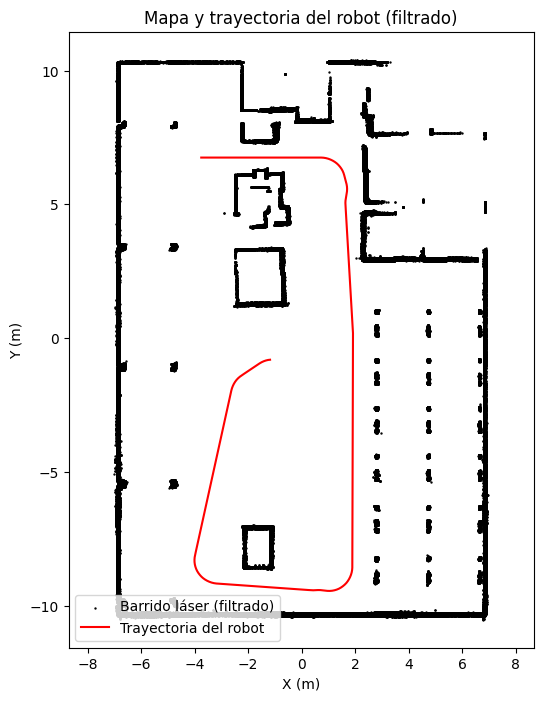

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import cKDTree

def cambioCoordenada(radio, angulo_rad):
    return np.array([
        radio * np.cos(angulo_rad),
        radio * np.sin(angulo_rad)
    ])

def transformarDatos(datos_scan, datos_odo, pares_indices):
    coordenadas_globales = []
    recorrido_x, recorrido_y = [], []

    for idx_scan, idx_odo in enumerate(pares_indices):
        lectura = datos_scan[idx_scan]
        fila_odo = datos_odo.iloc[idx_odo]

        t, x, y, theta = fila_odo['Tiempo'], fila_odo['x'], fila_odo['y'], fila_odo['ángulo']
        recorrido_x.append(x)
        recorrido_y.append(y)

        for angulo_grado, distancia in enumerate(lectura[1:]):
            if not np.isfinite(distancia):
                continue

            ang_rad = np.deg2rad(angulo_grado)
            punto_local = cambioCoordenada(distancia, ang_rad)

            # Aplicar rotación y traslación
            x_mundo = x + np.cos(theta) * punto_local[0] - np.sin(theta) * punto_local[1]
            y_mundo = y + np.sin(theta) * punto_local[0] + np.cos(theta) * punto_local[1]
            coordenadas_globales.append([x_mundo, y_mundo])

    return np.array(coordenadas_globales), np.column_stack((recorrido_x, recorrido_y))

def generarMapa(scan_file, odom_file):
    # Cargar datos
    odom = pd.read_csv(odom_file, header=None, sep=r'\s+')
    scan = pd.read_csv(scan_file, header=None, sep=r'\s+')

    odom.columns = ['Tiempo', 'x', 'y', 'ángulo', 'v', 'w']

    # Sincronizar tiempos
    tiempo_base = odom['Tiempo'][0]
    scan[0] -= tiempo_base
    odom['Tiempo'] -= tiempo_base

    # Emparejar por tiempo
    emparejados = np.searchsorted(odom['Tiempo'], scan[0], side='left')

    # Validar índices
    validos = emparejados < len(odom)
    scan = scan[validos]
    emparejados = emparejados[validos]

    # Corrección de índice si el anterior es más cercano
    for i in range(len(emparejados)):
        idx = emparejados[i]
        if idx == 0 or idx >= len(odom):
            continue
        t_odom = odom['Tiempo'].iloc[idx]
        t_ant = odom['Tiempo'].iloc[idx - 1]
        t_scan = scan.iloc[i, 0]
        if abs(t_ant - t_scan) < abs(t_odom - t_scan):
            emparejados[i] -= 1

    # Transformar a sistema global
    puntos_mundo, trayecto = transformarDatos(scan.values, odom, emparejados)

    # Filtrado por densidad
    radio_vecindad = 0.015
    minimo_vecinos = 5
    kdtree = cKDTree(puntos_mundo)
    vecinos = kdtree.query_ball_point(puntos_mundo, r=radio_vecindad)
    densos = [i for i, lista in enumerate(vecinos) if len(lista) >= minimo_vecinos]
    puntos_filtrados = puntos_mundo[densos]

    # Gráfica final
    plt.figure(figsize=(6, 8))
    plt.scatter(puntos_filtrados[:, 0], puntos_filtrados[:, 1], s=0.5, label='Barrido láser (filtrado)', color='black')
    plt.plot(trayecto[:, 0], trayecto[:, 1], color='red', label='Trayectoria del robot')

    # Ajustes del gráfico
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title('Mapa y trayectoria del robot (filtrado)')
    plt.axis('equal')
    plt.legend(loc='lower left')

    # Guardar imagen
    plt.savefig("Imágenes/Mapa_Filtrado.png")
    plt.show()

# Ejecutar el procesamiento
generarMapa('scan.txt', 'odom.txt')

**La carpeta con los archivos de texto y las imagenes generadas pueden verse en el siguiente link:**
* [Archivos](https://drive.google.com/drive/folders/1ZSnpB29V3maVVmTo-AS3ULdTAbb6sp-B?usp=sharing)